<a href="https://colab.research.google.com/github/roksanakanicka/fakturownik/blob/main/microtargeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criteo Data Analysis

In [33]:
# Loading the data
!pip install gdown

# Pobranie pliku z Google Drive
!gdown https://drive.google.com/uc?id=1KQOO_3R5CIiohPptTVFmk5kZ_nJ7KdEe

import pandas as pd

df = pd.read_csv("criteo-uplift-v2.1.csv.gz", compression="gzip")

Downloading...
From (original): https://drive.google.com/uc?id=1KQOO_3R5CIiohPptTVFmk5kZ_nJ7KdEe
From (redirected): https://drive.google.com/uc?id=1KQOO_3R5CIiohPptTVFmk5kZ_nJ7KdEe&confirm=t&uuid=4fc7f6d2-2d61-4ec4-ab46-06048dc6f3dd
To: /content/criteo-uplift-v2.1.csv.gz
100% 311M/311M [00:05<00:00, 60.7MB/s]


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Exploratory Data Analysis

In [35]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [37]:
df.shape

(13979592, 16)

In [38]:
df.dtypes

,0
f0,float64
f1,float64
f2,float64
f3,float64
f4,float64
f5,float64
f6,float64
f7,float64
f8,float64
f9,float64


In [39]:
# Zero brakujących wartości
df.isnull().sum()

,0
f0,0
f1,0
f2,0
f3,0
f4,0
f5,0
f6,0
f7,0
f8,0
f9,0


In [40]:
# cechy liczbowe
num_cols = [f"f{i}" for i in range(12)]

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
f0,13979592.0,19.620297,5.377464,12.616365,12.616365,21.923413,24.436459,26.745255
f1,13979592.0,10.069977,0.104756,10.059654,10.059654,10.059654,10.059654,16.344187
f2,13979592.0,8.446582,0.299316,8.214383,8.214383,8.214383,8.723335,9.051962
f3,13979592.0,4.178923,1.336645,-8.398387,4.679882,4.679882,4.679882,4.679882
f4,13979592.0,10.338837,0.343308,10.280525,10.280525,10.280525,10.280525,21.123508
f5,13979592.0,4.028513,0.431097,-9.011892,4.115453,4.115453,4.115453,4.115453
f6,13979592.0,-4.155356,4.577914,-31.429784,-6.699321,-2.411115,0.294443,0.294443
f7,13979592.0,5.101765,1.205248,4.833815,4.833815,4.833815,4.833815,11.998401
f8,13979592.0,3.933581,0.056660,3.635107,3.910792,3.971858,3.971858,3.971858
f9,13979592.0,16.027638,7.018975,13.190056,13.190056,13.190056,13.190056,75.295017


In [41]:
# zmienne binarne
bin_cols = ['treatment', 'conversion', 'visit', 'exposure']

df[bin_cols].agg(['sum', 'mean'])

,treatment,conversion,visit,exposure
sum,11882655.00,40774.000000,656929.000000,428212.000000
mean,0.85,0.002917,0.046992,0.030631


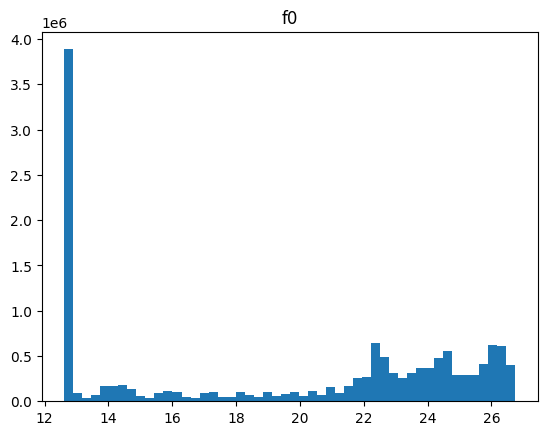

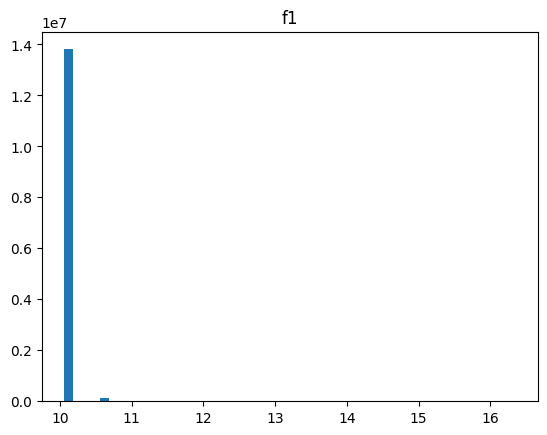

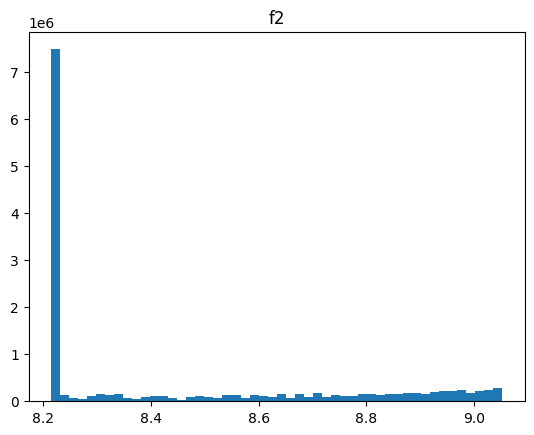

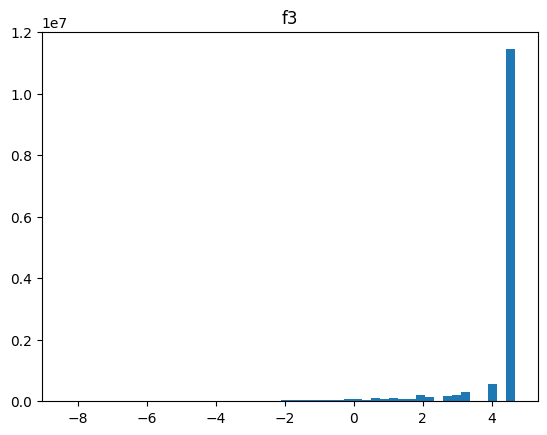

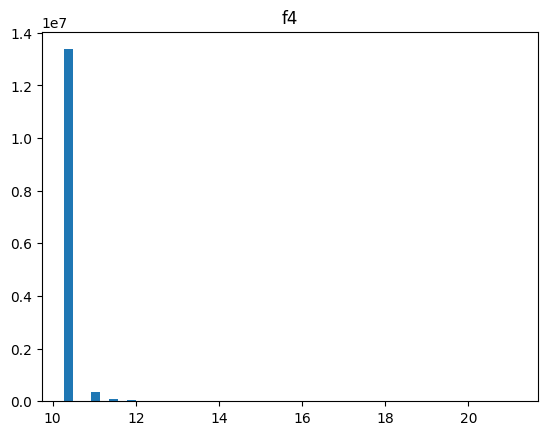

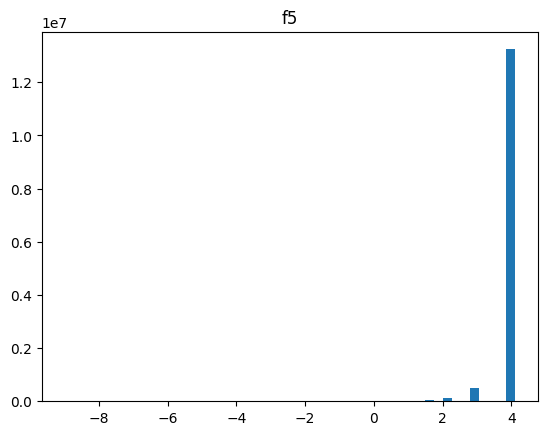

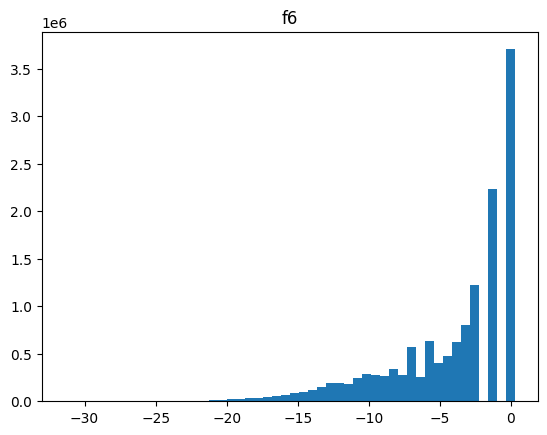

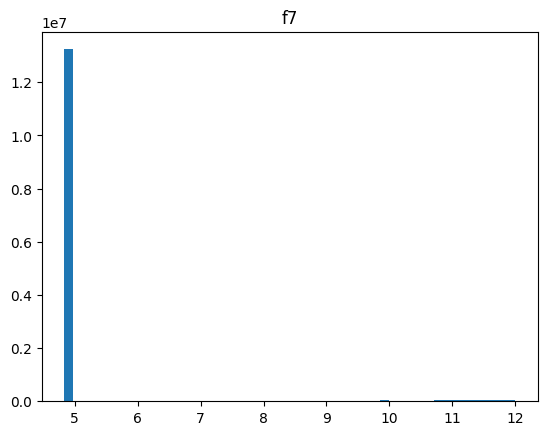

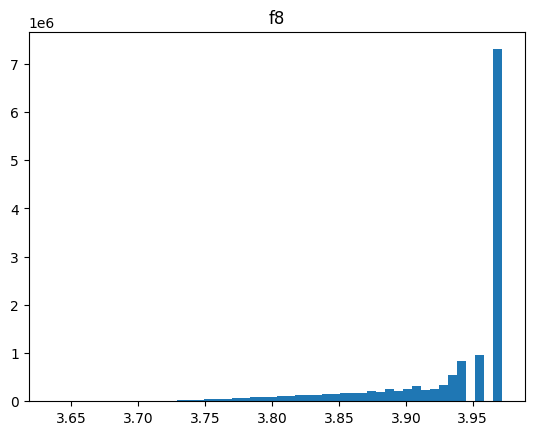

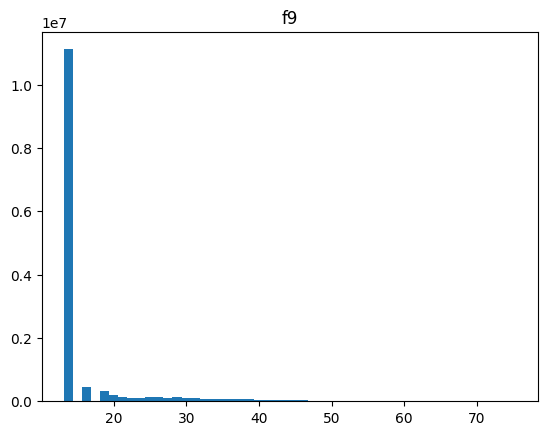

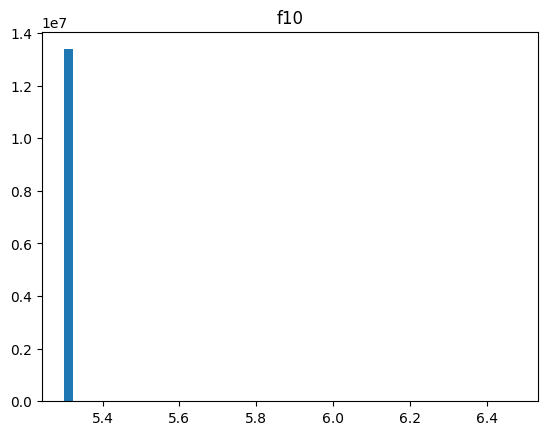

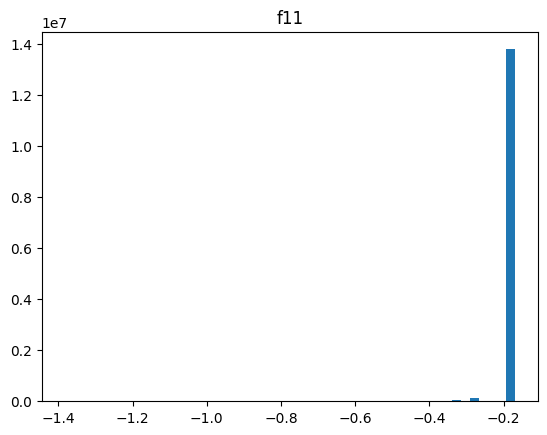

In [10]:
# Rozkład cech (Tylko f0, f2, f6, f8 są rozproszone)
for col in num_cols:
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.show()

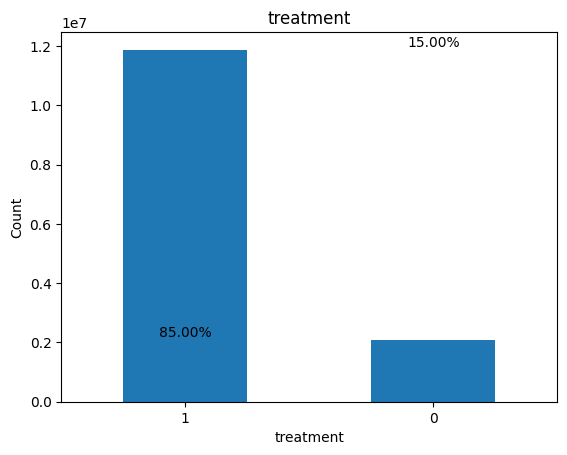

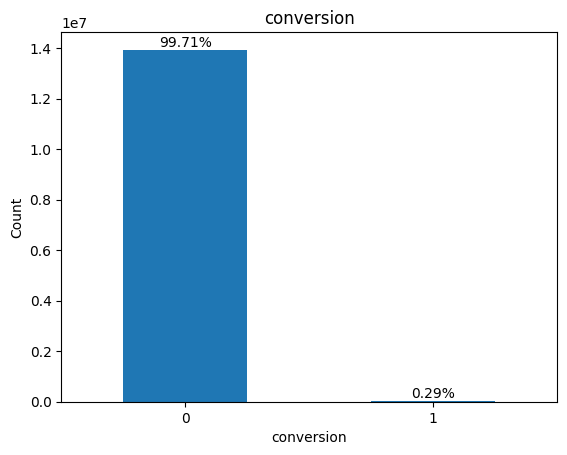

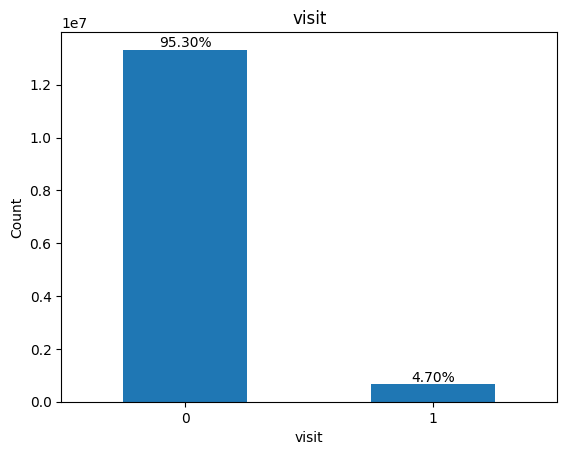

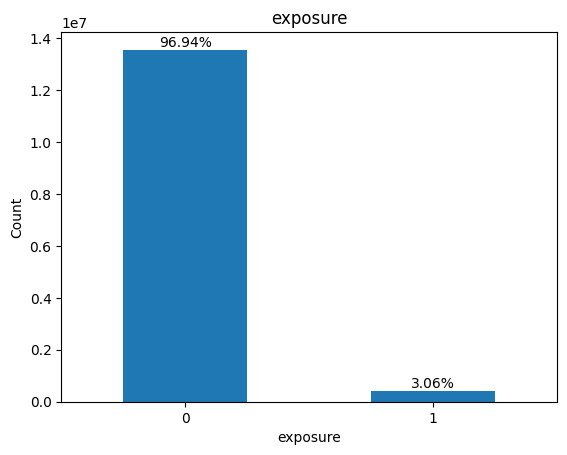

In [42]:
bin_cols = ['treatment', 'conversion', 'visit', 'exposure']

for col in bin_cols:
    counts = df[col].value_counts()
    percents = counts / counts.sum() * 100  # udział procentowy

    ax = counts.plot(kind='bar', title=col)
    plt.xticks(rotation=0)
    plt.ylabel("Count")

    # Dodanie procentowego udziału nad słupkami
    for i, p in enumerate(percents):
        ax.text(i, counts[i], f"{p:.2f}%", ha='center', va='bottom')

    plt.show()

In [12]:
control_rate = df[df['treatment']==0]['conversion'].mean()
treatment_rate = df[df['treatment']==1]['conversion'].mean()
baseline_uplift = treatment_rate - control_rate

print("Conversion in control:", control_rate)
print("Conversion in treatment:", treatment_rate)
print("Baseline uplift:", baseline_uplift)

# Kampania zwiększyła prawdopodobieństwo konwersji o 0.115 punktu procentowego

Conversion in control: 0.0019375880152813366
Conversion in treatment: 0.0030894610674129645
Baseline uplift: 0.0011518730521316279


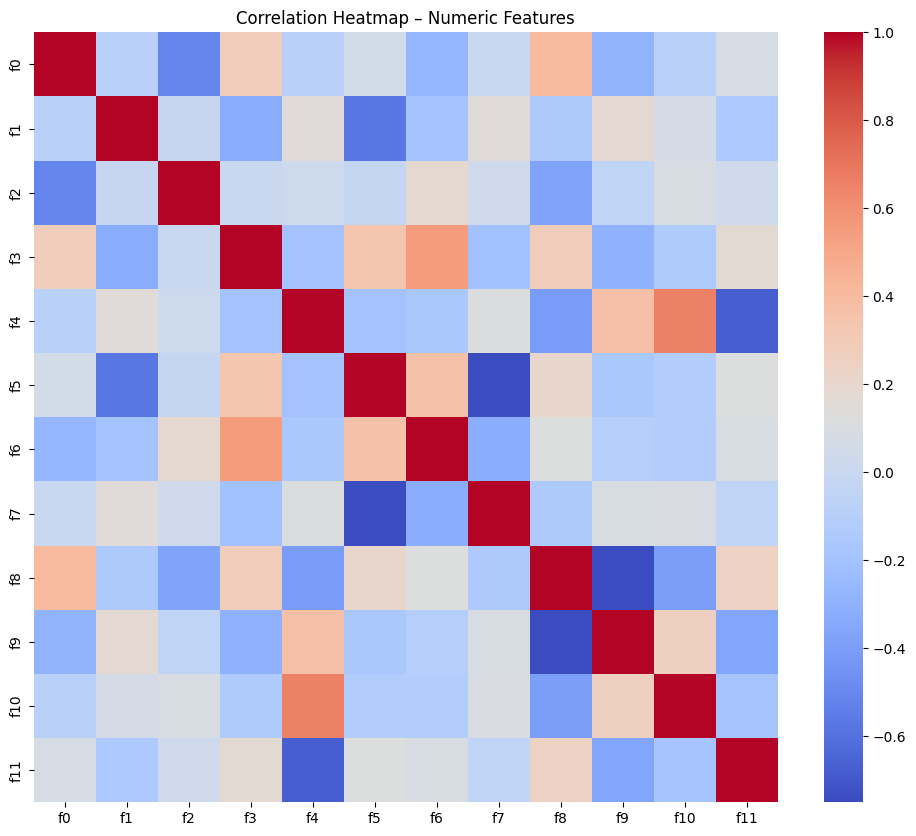

In [14]:
num_cols = [f"f{i}" for i in range(12)]

corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – Numeric Features")
plt.show()


# Data Preparation and Preprocessing

## Undersampling of the Dataset

In [24]:
# -----------------------------
# 1. Wydzielamy pozytywne i negatywne przypadki
# -----------------------------
df_positive = df[df['conversion'] == 1]  # wszystkie konwersje
df_negative = df[df['conversion'] == 0]  # przypadki bez konwersji

print("Pozytywne przypadki (conversion=1):", len(df_positive))
print("Negatywne przypadki (conversion=0):", len(df_negative))

# -----------------------------
# 2. Losowy undersampling negatywnych
# -----------------------------
k = 10  # 10× więcej negatywnych niż pozytywnych
target_negative = min(len(df_negative), len(df_positive) * k)  # aby nie wziąć więcej niż istnieje
df_negative_sampled = df_negative.sample(n=target_negative, random_state=42)

print("Negatywne przypadki po undersamplingu:", len(df_negative_sampled))

# -----------------------------
# 3️. Zbalansowanie treatment/control w negatywnych
# -----------------------------
neg_treat = df_negative_sampled[df_negative_sampled['treatment'] == 1]
neg_control = df_negative_sampled[df_negative_sampled['treatment'] == 0]

target_neg = min(len(neg_treat), len(neg_control))  # minimalna liczba z grupy negatywnej
neg_treat_bal = neg_treat.sample(target_neg, random_state=42)
neg_control_bal = neg_control.sample(target_neg, random_state=42)

# -----------------------------
# 4️. Zachowujemy wszystkie pozytywne przypadki
# -----------------------------
pos_treat = df_positive[df_positive['treatment'] == 1]
pos_control = df_positive[df_positive['treatment'] == 0]

# -----------------------------
# 5️. Łączenie w finalny dataset
# -----------------------------
df_final = pd.concat([neg_treat_bal, neg_control_bal, pos_treat, pos_control], ignore_index=True)

print("Rozmiar finalnego dataset:", df_final.shape)

# -----------------------------
# 6️. Podsumowanie
# -----------------------------
summary = df_final.groupby(['treatment', 'conversion']).agg(
    count=('conversion', 'size'),
    visit_mean=('visit', 'mean'),
    exposure_mean=('exposure', 'mean')
).reset_index()

summary['percent'] = round((summary['count'] / summary['count'].sum() * 100), 2)
summary


Pozytywne przypadki (conversion=1): 40774
Negatywne przypadki (conversion=0): 13938818
Negatywne przypadki po undersamplingu: 407740
Rozmiar finalnego dataset: (162880, 16)


,treatment,conversion,count,visit_mean,exposure_mean,percent
0,0,0,61053,0.035002,0.000000,37.48
1,0,1,4063,1.000000,0.000000,2.49
2,1,0,61053,0.045960,0.034871,37.48
3,1,1,36711,1.000000,0.627360,22.54


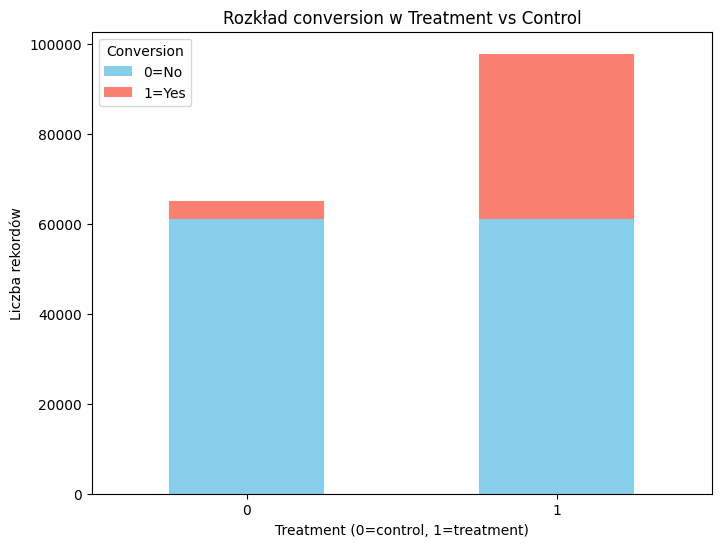

In [26]:
# Grupowanie
summary = df_final.groupby(['treatment', 'conversion']).size().unstack(fill_value=0)

# Stacked bar plot
summary.plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue','salmon'])

plt.title('Rozkład conversion w Treatment vs Control')
plt.ylabel('Liczba rekordów')
plt.xlabel('Treatment (0=control, 1=treatment)')
plt.xticks(rotation=0)

# Legenda
plt.legend(title='Conversion', labels=['0=No', '1=Yes'])
plt.show()

In [28]:
sizes = {
    "Oryginalny dataset": df.shape[0],
    "Po podziale na pozytywne i negatywne": len(df_positive) + len(df_negative),
    "Po undersamplingu negatywnych": len(df_negative_sampled) + len(df_positive),
    "Po zbalansowaniu negatywnych + wszystkie pozytywne": df_final.shape[0]
}

sizes_df = pd.DataFrame(list(sizes.items()), columns=['Etap', 'Liczba rekordów'])
sizes_df

,Etap,Liczba rekordów
0,Oryginalny dataset,13979592
1,Po podziale na pozytywne i negatywne,13979592
2,Po undersamplingu negatywnych,448514
3,Po zbalansowaniu negatywnych + wszystkie pozyt...,162880


In [32]:
# Liczba rekordów w każdej kombinacji treatment / conversion
df_counts = df_final.groupby(['treatment', 'conversion']).size().reset_index(name='count')
df_counts

,treatment,conversion,count
0,0,0,61053
1,0,1,4063
2,1,0,61053
3,1,1,36711


In [50]:
# Liczba rekordów w każdej kombinacji treatment / conversion
df_counts = df_final.groupby(['treatment', 'conversion']).size().reset_index(name='count')
print("Liczba rekordów w każdej grupie:")
print(df_counts)

# Suma po treatment
treatment_sum = df_final.groupby('treatment').size().reset_index(name='count')
print("\nSuma po treatment:")
print(treatment_sum)

# Suma po conversion
conversion_sum = df_final.groupby('conversion').size().reset_index(name='count')
print("\nSuma po conversion:")
print(conversion_sum)

# Całkowita liczba rekordów
total_count = pd.DataFrame({'Total': [df_final.shape[0]]})
print("\nCałkowita liczba rekordów:")
print(total_count)

Liczba rekordów w każdej grupie:
   treatment  conversion  count
0          0           0  61053
1          0           1   4063
2          1           0  61053
3          1           1  36711

Suma po treatment:
   treatment  count
0          0  65116
1          1  97764

Suma po conversion:
   conversion   count
0           0  122106
1           1   40774

Całkowita liczba rekordów:
    Total
0  162880


## Train-Test Split

In [51]:
# Stratified split po treatment i conversion
df_train, df_test = train_test_split(
    df_final,
    test_size=0.3,          # 30% danych na test
    random_state=42,
    stratify=df_final[['treatment','conversion']]
)

print("Rozmiar train:", df_train.shape)
print("Rozmiar test:", df_test.shape)

# Liczba rekordów w każdej kombinacji w train
train_counts = df_train.groupby(['treatment','conversion']).size().reset_index(name='count')
print("\nTrain set:")
print(train_counts)

# Liczba rekordów w każdej kombinacji w test
test_counts = df_test.groupby(['treatment','conversion']).size().reset_index(name='count')
print("\nTest set:")
print(test_counts)


Rozmiar train: (114016, 16)
Rozmiar test: (48864, 16)

Train set:
   treatment  conversion  count
0          0           0  42737
1          0           1   2844
2          1           0  42737
3          1           1  25698

Test set:
   treatment  conversion  count
0          0           0  18316
1          0           1   1219
2          1           0  18316
3          1           1  11013


## Segmentation

#### Standaryzacja

In [76]:
features = [f"f{i}" for i in range(12)]
X = df_train[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Wersja - Clustering

In [77]:
# Testowanie różnych k
for k in [4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_train[f'segment_k{k}'] = kmeans.fit_predict(X_scaled)

    summary = df_train.groupby(f'segment_k{k}').agg(
        count=('conversion', 'size'),
        treatment_mean=('treatment', 'mean'),
        conversion_mean=('conversion', 'mean')
    ).reset_index()

    print(f"\nSummary for k={k}: ")
    display(summary)


Summary for k=4: 


,segment_k4,count,treatment_mean,conversion_mean
0,0,17910,0.827247,0.812842
1,1,38265,0.539684,0.111825
2,2,47619,0.508810,0.023268
3,3,10222,0.854921,0.841029



Summary for k=5: 


,segment_k5,count,treatment_mean,conversion_mean
0,0,18114,0.827758,0.814232
1,1,36913,0.537290,0.108878
2,2,3952,0.868927,0.933957
3,3,8712,0.756428,0.576905
4,4,46325,0.509099,0.022817



Summary for k=6: 


,segment_k6,count,treatment_mean,conversion_mean
0,0,46042,0.507667,0.019678
1,1,6160,0.871104,0.980195
2,2,17070,0.784359,0.684944
3,3,8342,0.747303,0.552026
4,4,2686,0.867833,0.913999
5,5,33716,0.526189,0.084411


#### Wersja 2: MiniBatchKMeans, Silhouetter Score, Calinski-Hrabasz Index

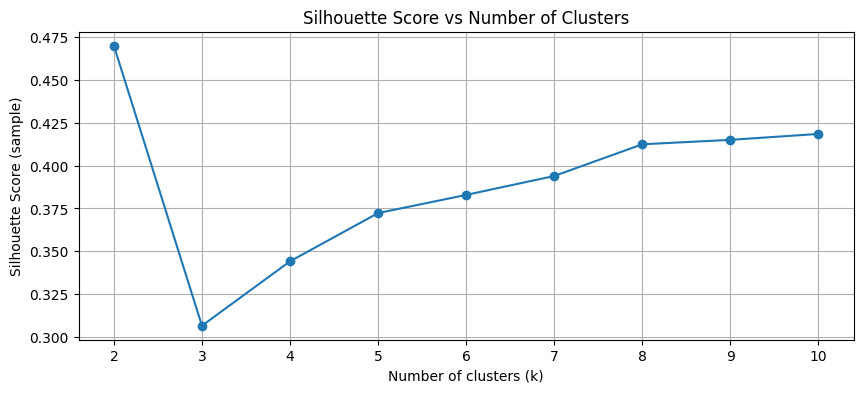

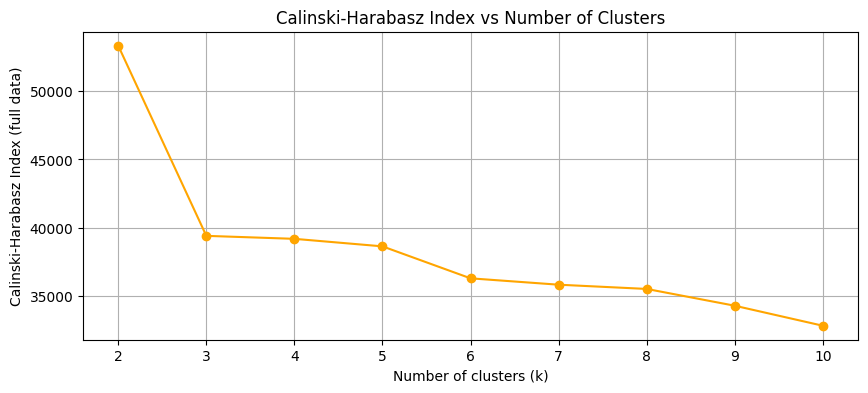

In [66]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

k_values = range(2, 11)
sil_scores = []
ch_scores = []

# Próbka dla Silhouette (50k rekordów lub mniej)
sample_size = min(50000, X_scaled.shape[0])
sample_idx = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
X_sample = X_scaled[sample_idx]

for k in k_values:
    # MiniBatchKMeans
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000)
    labels = kmeans.fit_predict(X_scaled)

    # Silhouette na próbce
    sil = silhouette_score(X_sample, kmeans.predict(X_sample))
    sil_scores.append(sil)

    # Calinski-Harabasz na całym zbiorze
    ch = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(ch)

# Wykres Silhouette
plt.figure(figsize=(10,4))
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score (sample)")
plt.grid(True)
plt.show()

# Wykres Calinski-Harabasz
plt.figure(figsize=(10,4))
plt.plot(k_values, ch_scores, marker='o', color='orange')
plt.title("Calinski-Harabasz Index vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Calinski-Harabasz Index (full data)")
plt.grid(True)
plt.show()


##### Wynik k=2 -> odrzucam

### Wybór k=5, mimo że segment 2 ma 3952 obserwacje to stanowią 2,4% całości obserwacji (>2%)

In [73]:
# Grupowanie po segmentach, k=5, dodanie visit i exposure
segment_summary_k5 = df_train.groupby('segment_k5').agg(
    count=('conversion', 'size'),
    treatment_mean=('treatment', 'mean'),
    conversion_mean=('conversion', 'mean'),
    visit_mean=('visit', 'mean'),
    exposure_mean=('exposure', 'mean')
).reset_index()

# Dodanie procentowego udziału segmentu
segment_summary_k5['percent'] = round(segment_summary_k5['count'] / segment_summary_k5['count'].sum() * 100, 2)

# Sortowanie konwersji malejąco
segment_summary_k5 = segment_summary_k5.sort_values(by='conversion_mean', ascending=False).reset_index(drop=True)

display(segment_summary_k5)


,segment_k5,count,treatment_mean,conversion_mean,visit_mean,exposure_mean,percent
0,2,3952,0.868927,0.933957,0.957237,0.781883,3.47
1,0,18114,0.827758,0.814232,0.880976,0.418903,15.89
2,3,8712,0.756428,0.576905,0.622819,0.443871,7.64
3,1,36913,0.537290,0.108878,0.146452,0.059681,32.38
4,4,46325,0.509099,0.022817,0.030523,0.018888,40.63


#### Segmentacja dla danych testowych na podstawie paramentrów z danych treningowych

In [86]:
# Standaryzacja cech dla danych testowych
X_test_scaled = scaler.transform(df_test[features])

# Przypisanie segmentów do danych testowych
df_test['segment'] = kmeans.predict(X_test_scaled)

# Grupowanie po segmentach w test set
segment_summary_test_k5 = df_test.groupby('segment').agg(
    count=('conversion', 'size'),
    treatment_mean=('treatment', 'mean'),
    conversion_mean=('conversion', 'mean'),
    visit_mean=('visit', 'mean'),
    exposure_mean=('exposure', 'mean')
).reset_index()

# Dodanie procentowego udziału segmentu
segment_summary_test_k5['percent'] = round(
    segment_summary_test_k5['count'] / segment_summary_test_k5['count'].sum() * 100, 2
)

# Sortowanie malejąco po conversion_mean
segment_summary_test_k5 = segment_summary_test_k5.sort_values(
    by='conversion_mean', ascending=False
).reset_index(drop=True)

display(segment_summary_test_k5)

,segment,count,treatment_mean,conversion_mean,visit_mean,exposure_mean,percent
0,1,2608,0.867715,0.978528,0.987730,0.528758,5.34
1,4,1209,0.891646,0.916460,0.947891,0.808106,2.47
2,2,7265,0.785134,0.690296,0.788025,0.359119,14.87
3,3,3483,0.745909,0.555843,0.604651,0.433247,7.13
4,5,14482,0.531971,0.087143,0.117180,0.047922,29.64
5,0,19817,0.503709,0.018116,0.024222,0.018620,40.56


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dodajemy kolumnę wskazującą zbiór
segment_summary_k5['set'] = 'Train'
segment_summary_test_k5['set'] = 'Test'

# Upewniamy się, że segmenty mają ten sam typ
segment_summary_k5['segment'] = segment_summary_k5['segment'].astype(int)
segment_summary_test_k5['segment'] = segment_summary_test_k5['segment'].astype(int)

# Łączymy tabele
segment_comparison = pd.concat([segment_summary_k5, segment_summary_test_k5], ignore_index=True)

# Meltujemy dane dla seaborn
df_melt = segment_comparison.melt(
    id_vars=['segment','set'],
    value_vars=['conversion_mean','treatment_mean','visit_mean','exposure_mean'],
    var_name='metric',
    value_name='value'
)

# Ustawiamy kolory dla Train i Test
palette_dict = {'Train':'#1f77b4', 'Test':'#ff7f0e'}

# Tworzymy subplots dla każdej metryki
metrics = ['conversion_mean','treatment_mean','visit_mean','exposure_mean']
fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(
        x='segment',
        y='value',
        hue='set',
        data=df_melt[df_melt['metric']==metric],
        palette=palette_dict,
        ax=axes[i],
        order=sorted(df_melt['segment'].unique()),
        hue_order=['Train','Test']
    )
    axes[i].set_title(metric.replace('_',' ').title())
    axes[i].set_ylabel("Mean")
    axes[i].set_xlabel("Segment")
    axes[i].legend(title='Set')

plt.tight_layout()
plt.show()


KeyError: 'segment'

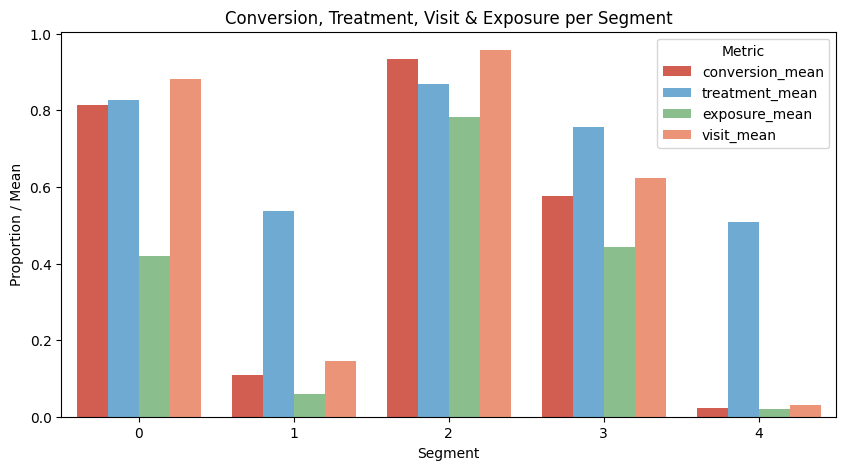

In [82]:
df_melt = segment_summary_k5.melt(
    id_vars='segment_k5',
    value_vars=['conversion_mean', 'treatment_mean', 'exposure_mean', 'visit_mean'],
    var_name='metric',
    value_name='value'
)

plt.figure(figsize=(10,5))

custom_palette = {
    'conversion_mean': '#E74C3C',
    'visit_mean': '#FF8A65',
    'treatment_mean': '#5DADE2',
    'exposure_mean': '#81C784'
}

sns.barplot(
    x='segment_k5',
    y='value',
    hue='metric',
    data=df_melt,
    palette=custom_palette
)

plt.title("Conversion, Treatment, Visit & Exposure per Segment")
plt.ylabel("Proportion / Mean")
plt.xlabel("Segment")
plt.legend(title='Metric')
plt.show()


In [84]:
# Posortowanie segmentów po conversion_mean malejąco
segment_summary_k5.sort_values(by='conversion_mean', ascending=False)


,segment_k5,count,treatment_mean,conversion_mean,visit_mean,exposure_mean,percent
0,2,3952,0.868927,0.933957,0.957237,0.781883,3.47
1,0,18114,0.827758,0.814232,0.880976,0.418903,15.89
2,3,8712,0.756428,0.576905,0.622819,0.443871,7.64
3,1,36913,0.537290,0.108878,0.146452,0.059681,32.38
4,4,46325,0.509099,0.022817,0.030523,0.018888,40.63
